# Задание
Выполните задания, используя jupyter.

### Задания для итоговой аттестации

<div class="alert alert-info">
Вы выбрали Dataset из списка, проведите полный цикл работы над вашим проектом, что проходили ранее. Pipeline выполнения задачи:

1. Загрузка и предобработка данных

2. Описательный анализ данных, просмотр данных и вывод статистики

3. Постройте необходимые графики для анализа

4. Проверьте гипотезы (если потребуется)

5. Сделайте промежуточный отчет-вывод по исследованию

6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

Рекомендации:

> Соблюдайте PEP8

> Комментируйте код в местах, где конструкция большая

> Оставляйте промежуточные выводы по вашему исследованию и построению модели (так кураторам будет проще понять ваши заключения)

> Экспериментируйте! Вы не ограничены в моделях и подходах. Можете использовать любые DS инструменты (и те, которые мы не разбирали с вами на курсе)

<div style='border:solid blue 2px; padding: 20px'>
    
# Об этом наборе данных
    
* Возраст : Возраст пациента

* Пол: Пол пациента

* пример: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)

* ca: количество крупных судов (0-3)

* cp : Тип боли в груди тип боли в груди

> Значение 1: типичная стенокардия
    
> Значение 2: атипичная стенокардия
    
> Значение 3: боль, не связанная с ангиной
    
> Значение 4: бессимптомный
    
* показатель trtbps : артериальное давление в состоянии покоя (в мм рт.ст.)

* холестерин : уровень холестерина в мг/дл определяется с помощью датчика ИМТ

* fbs : (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = ложно)

* rest_ecg : результаты электрокардиографии в состоянии покоя

> Значение 0: нормальное
    
> Значение 1: наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или понижение ST > 0,05 мВ)
    
> Значение 2: указывает на вероятную или определенную гипертрофию левого желудочка по критериям Эстеса
    
талах : достигнута максимальная частота сердечных сокращений

* цель : 0 = меньше шансов на сердечный приступ 1 = больше шансов на сердечный приступ

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, top_k_accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from IPython.display import Image
from IPython.core.display import HTML

import warnings
warnings.filterwarnings("ignore")

In [2]:
Image(url="https://faktrus.ru/wp-content/uploads/interesnie-fakti-o-serdtse-cheloveka.jpg")

<div class="alert alert-info">

> 1. Загрузка и предобработка данных

> 2. Описательный анализ данных, просмотр данных и вывод статистики

> 3. Постройте необходимые графики для анализа

> 4. Проверьте гипотезы (если потребуется)

> 5. Сделайте промежуточный отчет-вывод по исследованию

In [3]:
df = pd.read_csv('./heart.csv')

In [4]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<div class="alert alert-success">
Все данные у нас количественные. Никаких пропусков не обнаружено

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

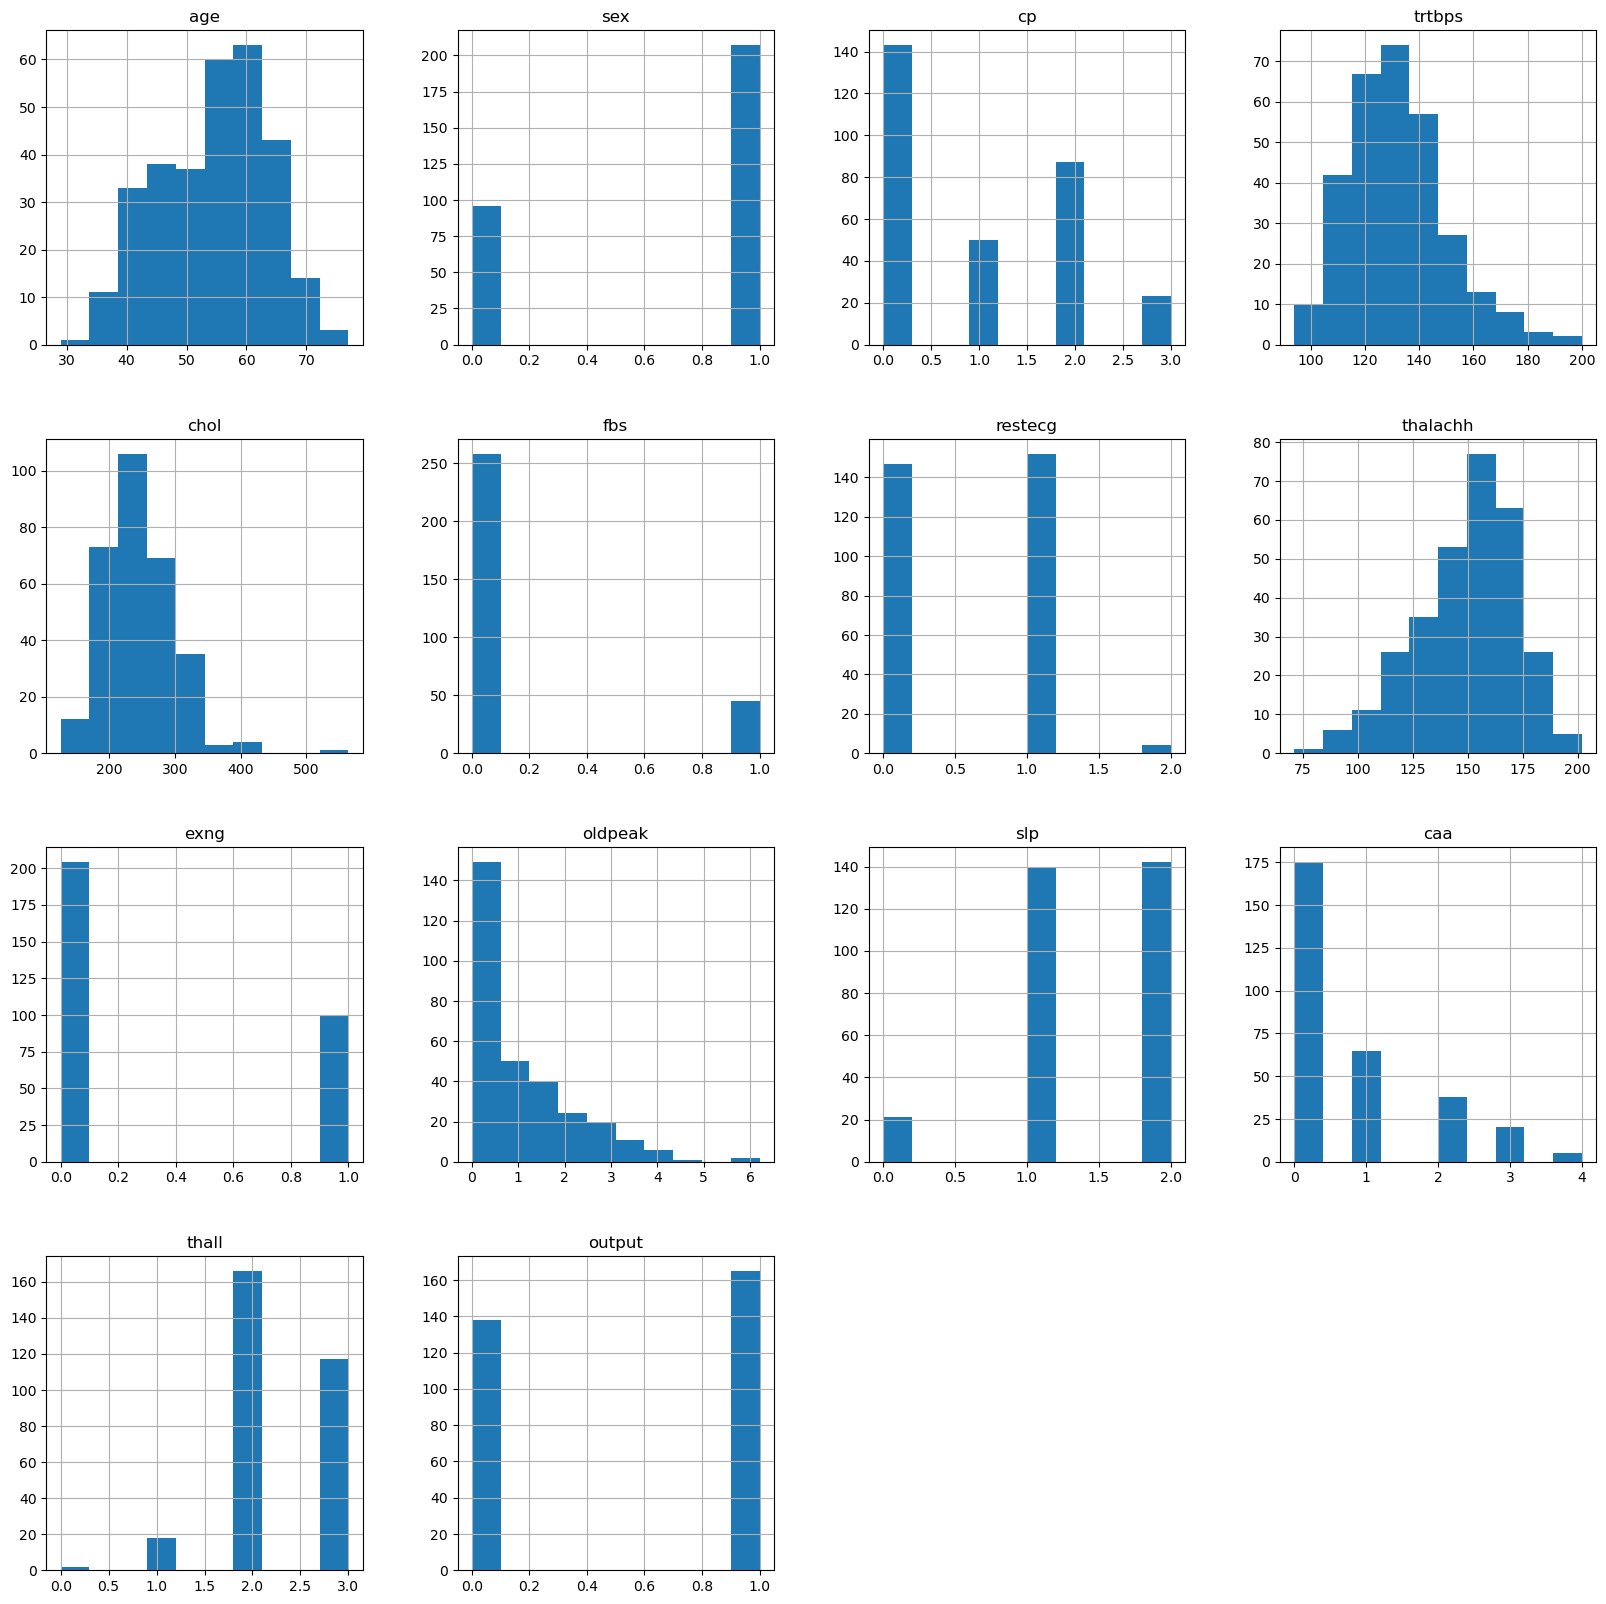

In [6]:
df.hist(figsize=(20, 20))

<div class="alert alert-warning">
Намеки на нормальное распределение отсутсвуют

**Проверка целевых классов**

Text(0, 0.5, 'Частота')

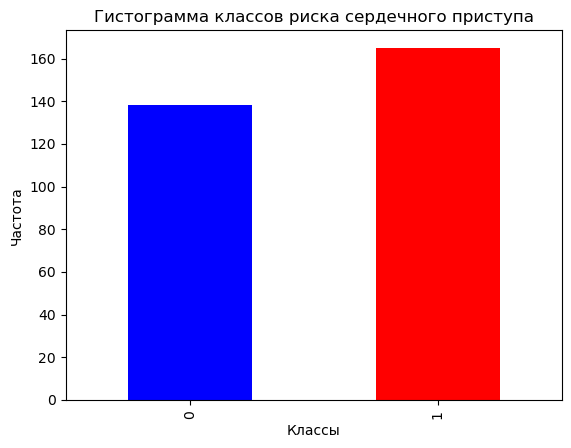

In [7]:
count_classes = pd.value_counts(df['output'], sort=True).sort_index()
count_classes.plot(kind='bar', color=['b', 'r'])
plt.title("Гистограмма классов риска сердечного приступа")
plt.xlabel("Классы")
plt.ylabel("Частота")

<div class="alert alert-warning">
Классы более-менее нормально распредлены

**Проведем ускоренный EDA**

In [8]:
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-success">
    
**Выводы:**

* Основная категория опрашиваемых имеют возраст 68 - 70 лет
    > Самый юный пациент - 29 лет
    
* Большиство опршиваемых 68% (207 человек) - мужчины
    
* По cp - Тип боли в груди тип боли в груди бошиство имеют тип 0, то есть типичная стенокардия, сопровождающееся чувством дискомфорта или сжимающей, давящей болью в грудной клетке, которая может иррадиировать (отдавать) в левую руку, шею, нижнюю челюсть и эпигастральную область
    
* Артериальное давление в состоянии покоя у 95% процентов опрашиваемых превышает норму - 160 мм рт.ст.
    
* Холестерин у многих также превышен

<div class="alert alert-info">
Построим карту коореляции

<Figure size 3000x10000 with 0 Axes>

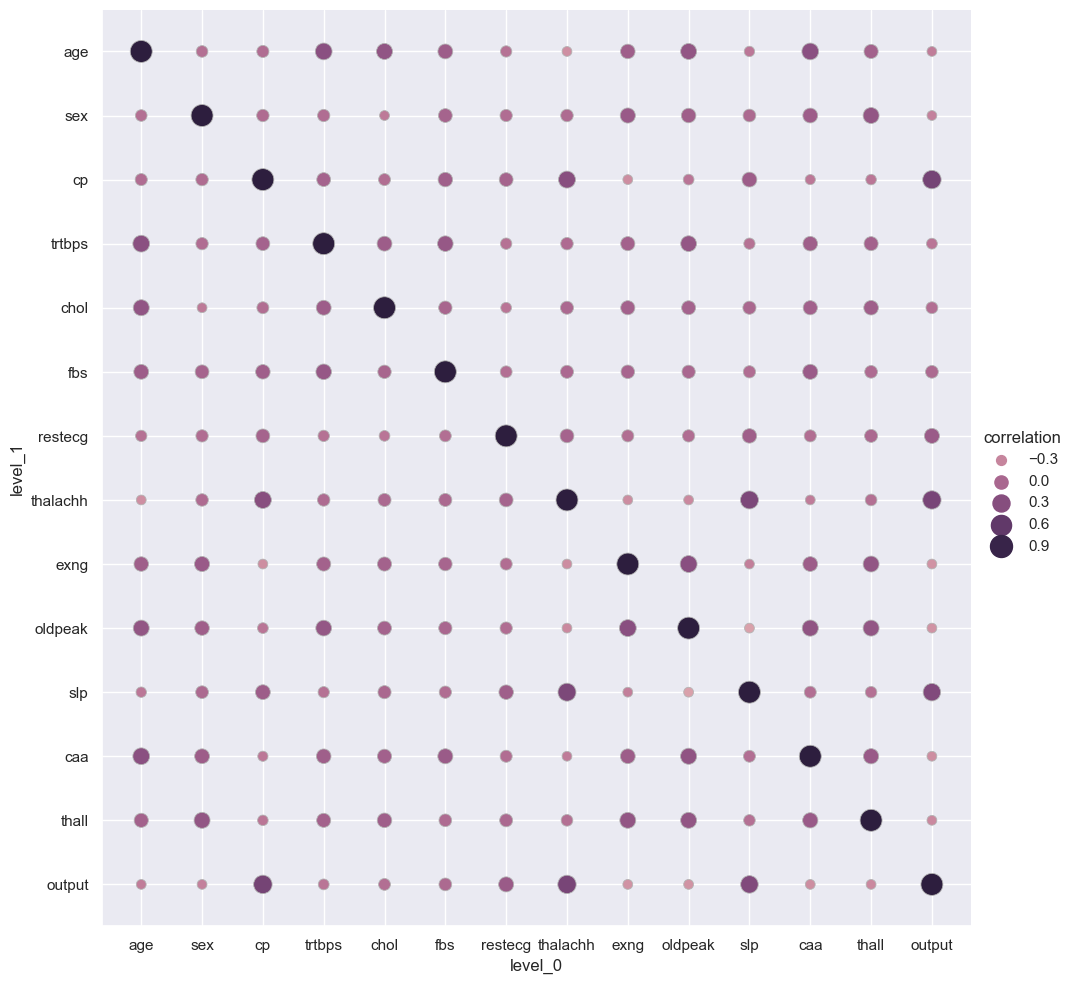

In [9]:
plt.figure(figsize=(30, 100))
sns.set_theme(style="darkgrid")
corr_mat = df.corr(numeric_only=True).stack().reset_index(name="correlation")

g = sns.relplot(data=corr_mat, x="level_0", y="level_1", hue="correlation", size="correlation", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),)

<div class="alert alert-success">
    
1. Согласно тепловой карте, очевидной линейной корреляции между непрерывными переменными нет.
2. Матрица тепловой карты диаграммы рассеяния предполагает, что может существовать некоторая корреляция между выходом и cp, thalachh и slp.
3. Интуитивно понятно, что пожилые люди могут иметь более высокие шансы на сердечный приступ, но, согласно графику распределения выходных данных age wrt, очевидно, что это не так.

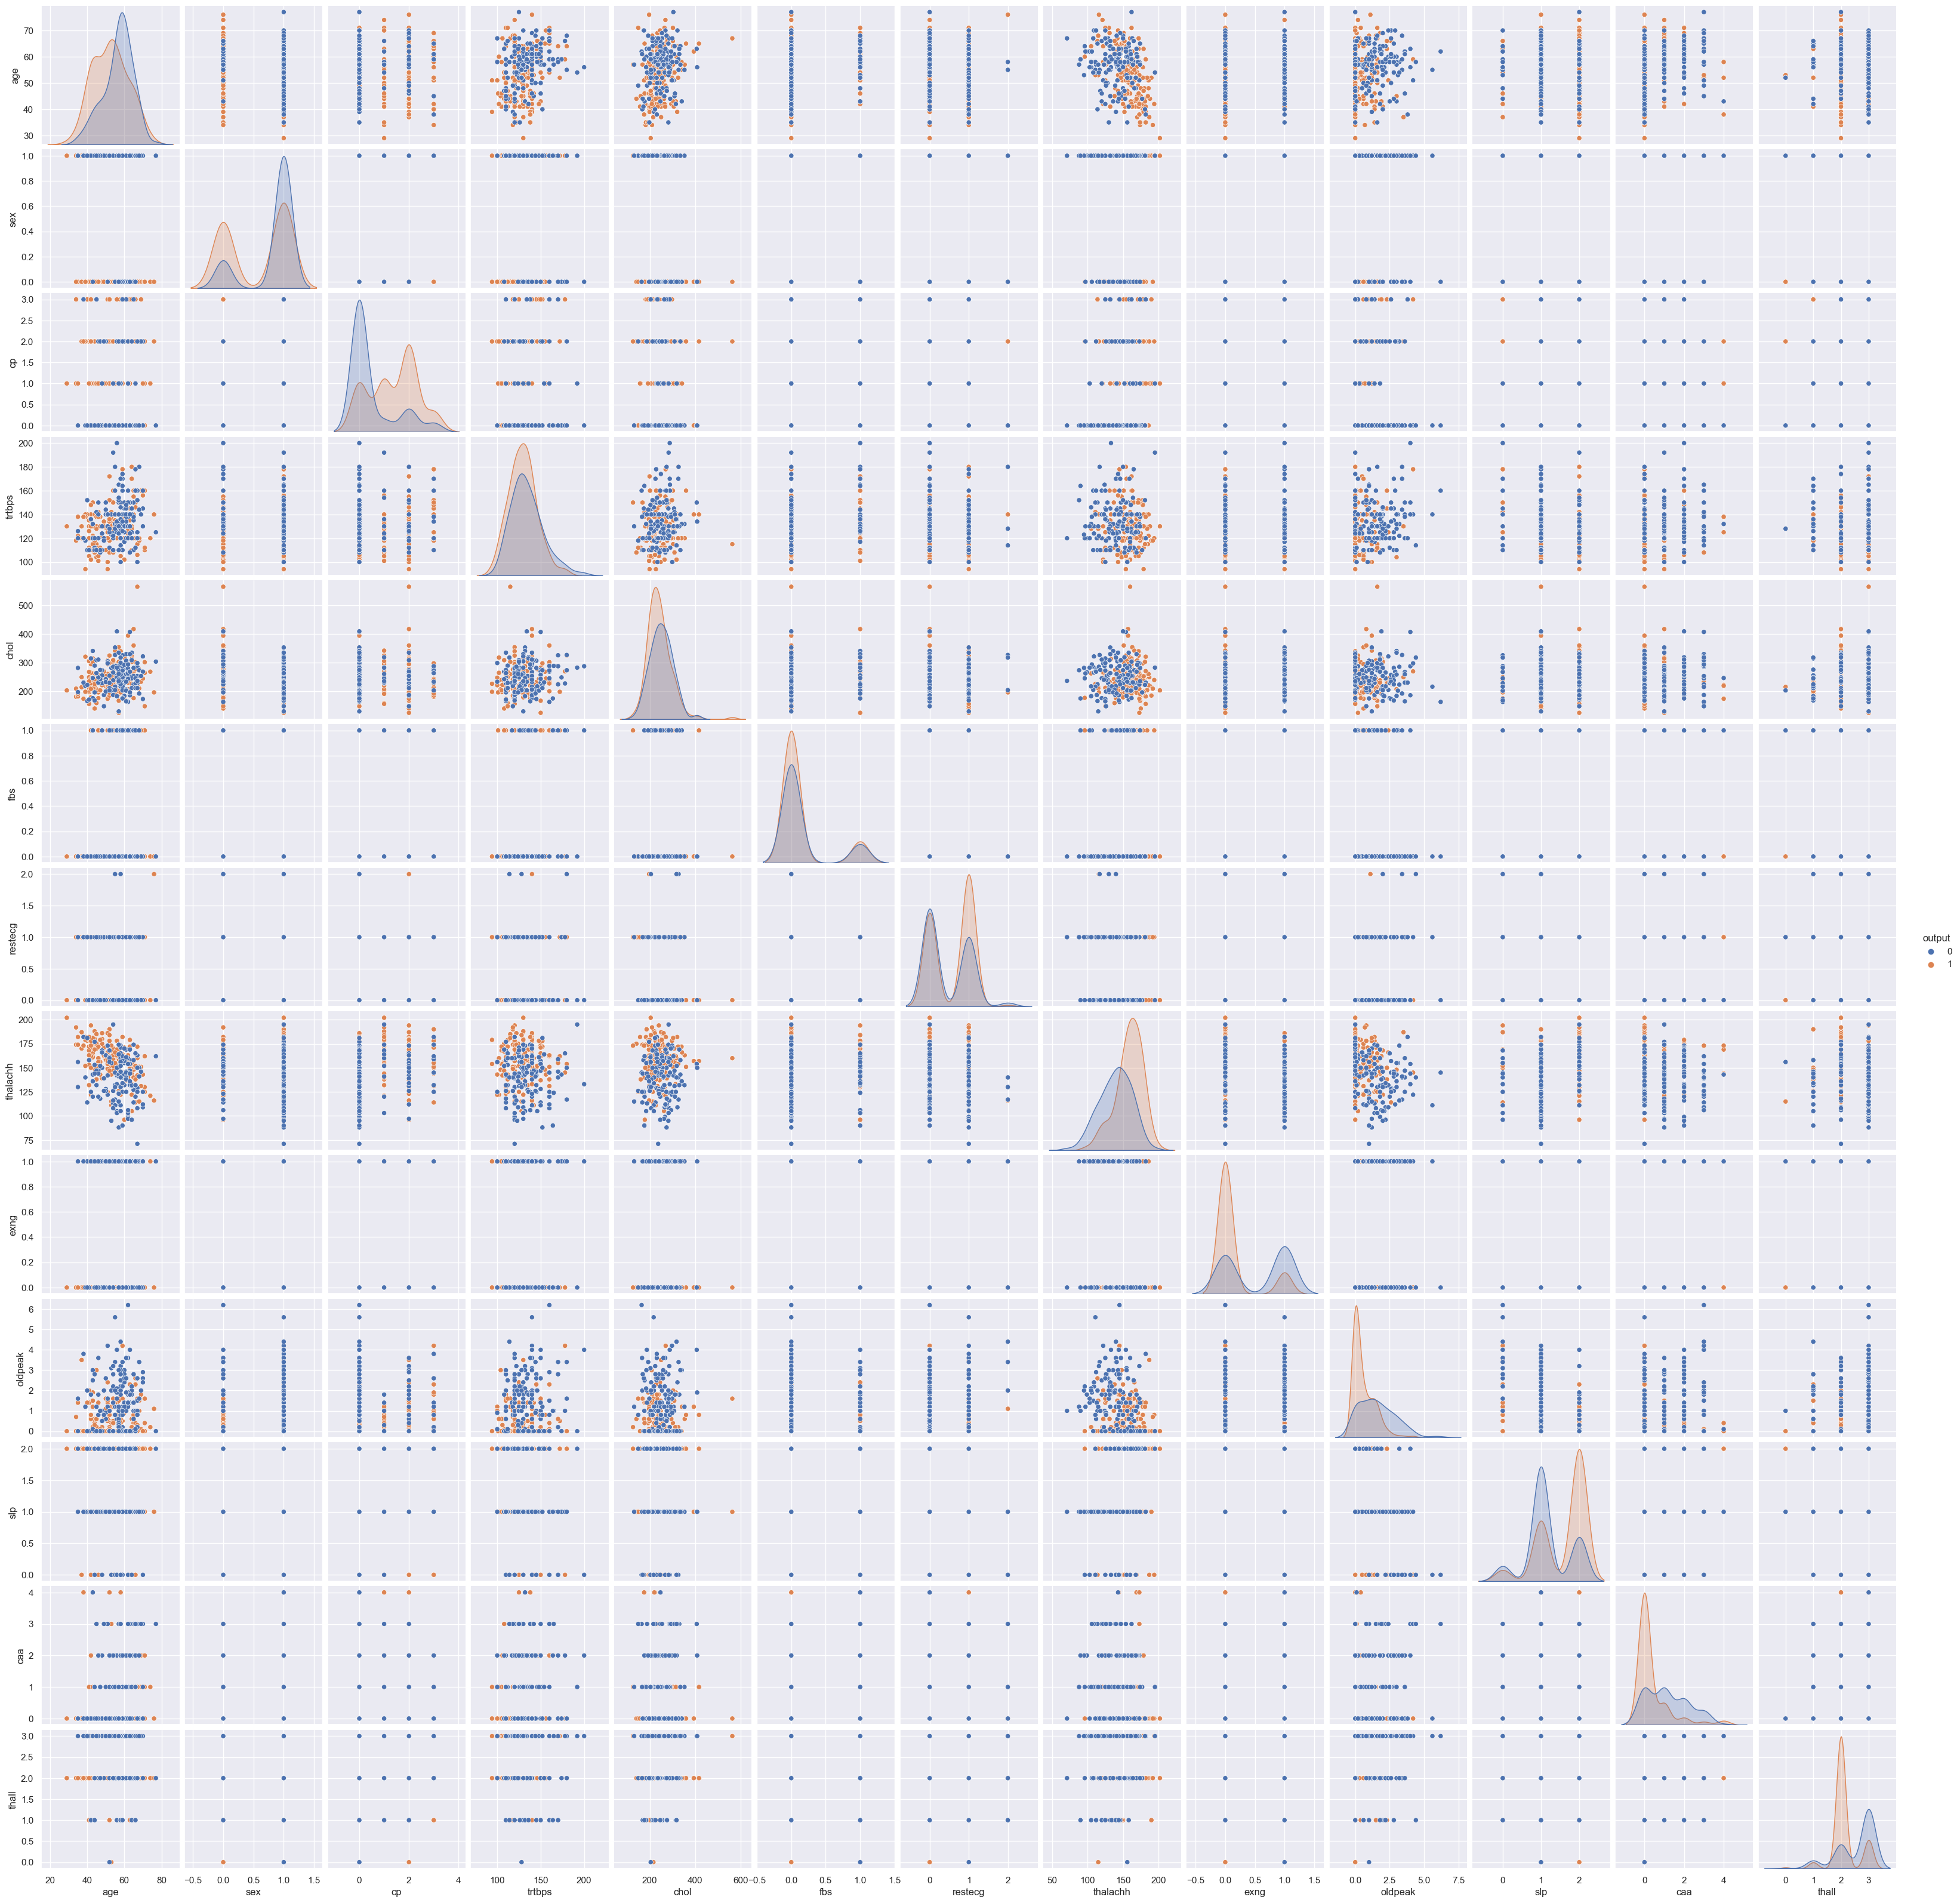

In [10]:
# Графическое представление взаимосвязей между парами переменных в DataFrame
sns.pairplot(df, hue='output')

<div class="alert alert-info">
    
> 6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

> 7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

> 8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

> 9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

> 10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

<div style='border:solid blue 2px; padding: 20px'>
Оценка roc_auc_score:

Основная идея: roc_auc_score представляет собой метрику для оценки качества моделей машинного обучения, которая измеряет способность модели различать между классами.

Пример из реальной жизни или аналогия: Допустим, у вас есть модель, которая предсказывает, является ли письмо спамом или не спамом. Вы хотите оценить, насколько хорошо модель различает между спамом и не спамом. Вы можете использовать оценку roc_auc_score для измерения ее производительности.

Резюме: Оценка roc_auc_score - это метрика, которая помогает оценить способность модели машинного обучения различать между классами.

In [11]:
# Создаем тренировочную и валидационную выборки.
X = df.drop(["output"], axis=1)
y = df["output"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
# Построение конвейеров standardscaler и model для различных классификаций.

pipe = Pipeline([ 
    ('scaler', StandardScaler()),
    ('classify', DecisionTreeClassifier(class_weight='balanced', random_state=0))
])

params = [
    {'classify': [LogisticRegression(class_weight='balanced', random_state=0)]}, 
    {'classify': [SVC(class_weight='balanced',  random_state=0)]},
    {'classify': [GaussianNB()]},
    {'classify': [GradientBoostingClassifier(random_state=0)]},
    {'classify': [RandomForestClassifier(class_weight='balanced', random_state=0)], 'classify__max_depth': [2, 5, 10, 20],
                                                                                    'classify__n_estimators': [2, 4, 6, 8],
                                                                                    'classify__min_samples_split': [2, 4, 8, 10],
                                                                                    'classify__min_samples_leaf': [1, 2, 4, 6]},
    {'classify': [XGBClassifier(random_state=0)], 'classify__max_depth': [2, 4, 6, 8], 
                                                  'classify__n_estimators': [2, 5, 10, 20]}
]

grid_search = GridSearchCV(pipe, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X=X_train, y=y_train)
print('Качество модели на тестовой выборке c лучшей моделью:', {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])})

Качество модели на тестовой выборке c лучшей моделью: {0.8872445384073291}


In [14]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('classify',
                 LogisticRegression(class_weight='balanced', random_state=0))])

## Приведем пример dummy-модели

In [15]:
# Создание dummy модели
dummy_model = DummyClassifier(strategy="uniform")  # Стратегия "uniform" выбирает классы случайным образом

# Обучение модели
dummy_model.fit(X_train, y_train)

# Предсказание классов на тестовом наборе данных
y_pred = dummy_model.predict(X_test)

# Оценка точности модели
roc_auc = roc_auc_score(y_test, y_pred)
print("Roc_auc:", roc_auc)

Roc_auc: 0.4608879492600423


<div class="alert alert-success">

# Вывод:
    
1. В приведенных выше оценках LogisticRegression, по-видимому, является моделью с наилучшей оценкой по отрицательной среднеквадратичной ошибке.
    
2. ### «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?
    
> Машинное обучение нужно, так как задача требует анализа данныхи построения модели, которая может автоматически улучшаться на основе опыта. Однако, в некоторых случаях, можно обойтись dummy-предсказанием, если точность не является критическим фактором.